<a href="https://colab.research.google.com/github/ASL-TS/Human-Activity-Recognition-using-CNN/blob/basic-nn-from-csv/Loading_Data_from_CSV_as_TF_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Training of a Model

In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.1
Eager execution: True


In [ ]:
TRAINING_DATA_PATH = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/training_tf.csv'
TRAINING_DATA_PATH_MODDED = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/training_tf_features_0_to_2.csv'
TEST_DATA_PATH_MODDED = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/test_tf_features_0_to_2.csv'

TEST_DATA_PATH = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/test_tf.csv'


In [ ]:
!head -n5 {TEST_DATA_PATH_MODDED}

39.99,-123.62,-5.66,-12.3,-4.43,-11.19,-4.06,12.33,-4.44,11.51,0
39.95,-123.52,-10.93,-23.94,-8.47,-21.69,-7.77,175.92,-8.54,164.5,0
39.88,-123.43,-15.9,-34.6,-12.23,-31.38,-11.12,176,-12.37,164.66,0
39.81,-122.85,-20.44,-172.57,-15.69,-159.28,-14.31,176.09,-15.91,164.84,0
39.7,-122.73,-24.61,-172.61,-18.88,-159.27,-17.31,177.35,-19.17,167.17,0


In [ ]:
column_names = ["TR", "TP", "IR", "IP", "MR", "MP", "RR","RP","PR","PP", "Letter"]
feature_names = column_names[:-1]
label_name = column_names[-1]
batch_size = 32

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))



Features: ['TR', 'TP', 'IR', 'IP', 'MR', 'MP', 'RR', 'RP', 'PR', 'PP']
Label: Letter


In [ ]:
class_names = ['A','B','C']

In [ ]:
train_dataset = tf.data.experimental.make_csv_dataset(
    TRAINING_DATA_PATH_MODDED,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1 
)


In [ ]:
features,labels = next(iter(train_dataset))
print(features)

OrderedDict([('TR', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 3.12,  3.93, 32.36, 49.15, 48.01, 43.33,  0.02,  3.25, -0.98,
       32.33, 49.89,  4.54, 48.13, 33.24, -2.2 ,  3.93, 32.53,  4.36,
       -0.58, 49.6 ,  4.13, 51.1 , 43.66, 33.87, 43.52,  2.45,  4.55,
       32.63,  1.04,  5.78, 41.64, 48.97], dtype=float32)>), ('TP', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ -50.67,  -51.71,  -93.73, -121.51, -112.6 , -124.94,  -49.11,
        -50.4 ,  -50.34,  -93.83, -135.06,  -52.27, -112.45,  -98.65,
        -50.08,  -51.63,  -93.62,  -52.12,  -50.45, -113.21,  -51.95,
       -128.73, -124.47,  -88.5 , -117.56,  -46.79,  -51.91,  -93.65,
        -50.57,  -48.08, -113.  , -113.55], dtype=float32)>), ('IR', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 53.94,  54.66,   0.69, -65.28, -64.28, -56.05,  54.  ,  53.39,
        51.41,   0.65, -65.97,  52.39, -64.36,   4.29,  51.68,  54.74,
         0.59,  53.98,  51.37, -64.38,  54.49, -66.08, -67.7 ,   2.96,

In [ ]:
# print('length of list of train dataset ' + str(len(list(train_dataset))))
# num_of_entries = 0
# for x in train_dataset:
#   num_of_entries += x[0].shape[0]

# print(num_of_entries)

In the following graph we can see that from the three letters in the dataset ``A,B,C`` the ``Index Pitch`` and ``Index Roll`` is pretty distinct for all three letters and we can see how they cluster in the graph

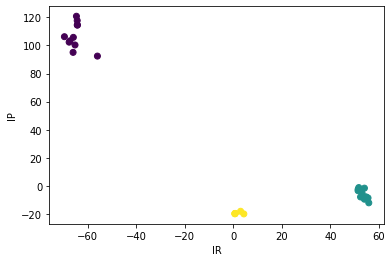

In [ ]:
plt.scatter(features['IR'],
            features['IP'],
            c=labels,
            cmap='viridis')

plt.xlabel("IR")
plt.ylabel("IP")
plt.show()

In [ ]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [ ]:
# train_dataset.map(pack_features_vector)
print(train_dataset)
train_dataset = train_dataset.map(pack_features_vector)
print(train_dataset)

<PrefetchDataset shapes: (OrderedDict([(TR, (None,)), (TP, (None,)), (IR, (None,)), (IP, (None,)), (MR, (None,)), (MP, (None,)), (RR, (None,)), (RP, (None,)), (PR, (None,)), (PP, (None,))]), (None,)), types: (OrderedDict([(TR, tf.float32), (TP, tf.float32), (IR, tf.float32), (IP, tf.float32), (MR, tf.float32), (MP, tf.float32), (RR, tf.float32), (RP, tf.float32), (PR, tf.float32), (PP, tf.float32)]), tf.int32)>
<MapDataset shapes: ((None, 10), (None,)), types: (tf.float32, tf.int32)>


In [ ]:
features, labels = next(iter(train_dataset))
print(labels[:5])


tf.Tensor([0 1 0 2 2], shape=(5,), dtype=int32)


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(10,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [ ]:
predictions = model(features)
predictions[:5]


<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-16.442,   0.851,  26.801],
       [-13.247,  24.803,  33.229],
       [-16.24 ,   1.268,  26.861],
       [ -7.546,  25.73 ,  29.889],
       [ -7.515,  25.683,  29.888]], dtype=float32)>

In [ ]:
print(tf.nn.softmax(predictions[:5]))

tf.Tensor(
[[0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.015 0.985]
 [0.    0.015 0.985]], shape=(5, 3), dtype=float32)


In [ ]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [0 1 0 2 2 2 1 2 1 2 0 0 0 1 1 2 1 1 1 0 1 2 2 0 1 0 1 1 1 2 0 1]


In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 17.913822174072266


In [ ]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 17.913822174072266
Step: 1,         Loss: 25.193370819091797


In [ ]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 101

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.463, Accuracy: 98.401%
Epoch 050: Loss: 0.000, Accuracy: 100.000%
Epoch 100: Loss: 0.000, Accuracy: 100.000%


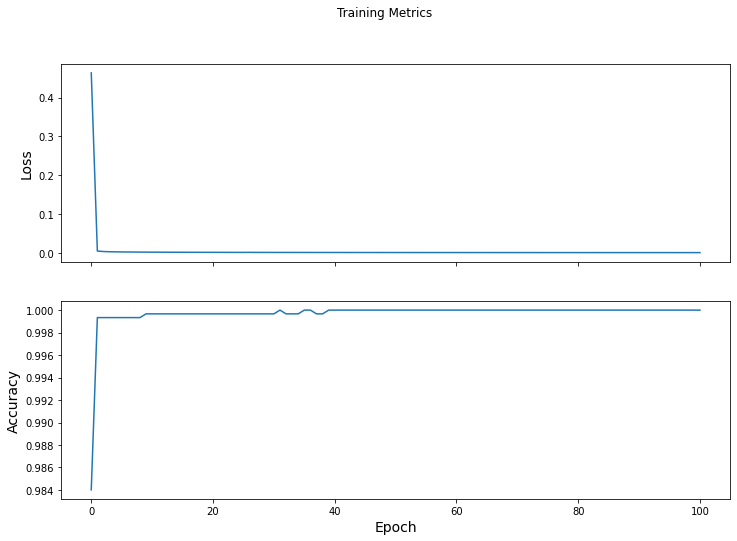

In [ ]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
test_dataset = tf.data.experimental.make_csv_dataset(
    TEST_DATA_PATH_MODDED,
    batch_size,
    column_names=column_names,
    label_name='Letter',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [ ]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 55.619%


In [ ]:
# tf.stack([y,prediction],axis=1)
print(y)
print(prediction)

tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(23,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(23,), dtype=int32)


In [ ]:
predict_dataset = tf.convert_to_tensor([
    [39.99,-123.62,-5.66,-12.3,-4.43,-11.19,-4.06,12.33,-4.44,11.51], #A
    [11.11,-25.33,67.49,-24.24,64.54,19.06,64.01,-0.33,63.13,33.2],   #B
    [1.33,-107.55,-3.9,-21.71,-19.98,13.58,-17.47,9.02,-3.4,47.38],    #C
    [18.67,-21.49,78.84,28.21,69.93,59.55,76.96,38.69,76.55,56.49],
    [18.59,-21.59,78.75,29.09,69.82,60.38,76.91,39.52,76.29,57.99],
    [18.53,-21.44,78.81,30.85,69.75,61.36,76.92,40.68,75.94,58.88],
    [18.44,-21.17,78.83,32.83,69.69,62.29,76.94,41.66,75.71,59.73],
    [18.32,-20.82,78.89,33.33,69.62,62.97,77.01,42.19,75.5,60.57],
    [18.24,-20.53,78.98,34.66,69.47,63.57,76.68,42.09,74.95,61.24]
])


# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  # print(i,p)
  print("Example {} prediction: {} ({:4.1f}%)".format(i, class_idx, 100*p))

Example 0 prediction: 2 (100.0%)
Example 1 prediction: 0 (99.0%)
Example 2 prediction: 2 (100.0%)
Example 3 prediction: 0 (99.8%)
Example 4 prediction: 0 (99.8%)
Example 5 prediction: 0 (99.8%)
Example 6 prediction: 0 (99.8%)
Example 7 prediction: 0 (99.8%)
Example 8 prediction: 0 (99.7%)


# Using the Fit and Compile Function

In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.1
Eager execution: True


In [ ]:
TRAINING_DATA_PATH = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/training_tf.csv'
TRAINING_DATA_PATH_MODDED = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/training_tf_features_0_to_2.csv'
TEST_DATA_PATH_MODDED = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/test_tf_features_0_to_2.csv'

TEST_DATA_PATH = '/content/drive/MyDrive/COLLEGE/College\ 3rd\ Year/Senior\ Design/Machine\ Learning/Learning/test_tf.csv'


In [ ]:
!head -n5 {TRAINING_DATA_PATH_MODDED}

42.96,-128.88,-4.87,6.26,-3.89,12.05,-4.25,8.43,-3.53,8.43,0
42.92,-128.66,-9.26,93.05,-7.42,172.45,-8.15,120.86,-6.78,122.45,0
42.95,-128.49,-13.45,92.9,-10.78,172.5,-11.78,120.84,-9.8,122.41,0
42.96,-126.86,-17.3,92.9,-13.87,172.57,-15.15,120.83,-12.61,122.38,0
42.95,-126.86,-20.93,92.07,-16.76,172.76,-18.3,120.99,-15.23,122.21,0


In [ ]:
column_names = ["TR", "TP", "IR", "IP", "MR", "MP", "RR","RP","PR","PP", "Letter"]
feature_names = column_names[:-1]
label_name = column_names[-1]
batch_size = 32

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))



Features: ['TR', 'TP', 'IR', 'IP', 'MR', 'MP', 'RR', 'RP', 'PR', 'PP']
Label: Letter


In [ ]:
class_names = ['A','B','C']

In [ ]:
train_dataset = tf.data.experimental.make_csv_dataset(
    TRAINING_DATA_PATH_MODDED,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1 
)


In [ ]:
features,labels = next(iter(train_dataset))
print(features)

OrderedDict([('TR', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 3.33, 32.62, 43.07, 41.11,  4.26, 32.13, 43.85, 32.52, 31.45,
       41.67, 30.84, 32.54,  4.62,  3.5 ,  4.85, 44.44, 44.21, 30.67,
       33.14, 33.58,  4.42, 46.38, 32.13,  3.89, 41.53,  4.49, -0.1 ,
        3.34, 47.72, 42.22,  4.84, 31.87], dtype=float32)>), ('TP', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ -51.01,  -93.49, -122.59, -119.9 ,  -52.06,  -93.54, -120.49,
        -93.31,  -94.75, -124.33,  -94.77,  -99.15,  -52.04,  -51.67,
        -52.26, -116.2 , -112.27,  -94.29,  -98.65,  -85.75,  -52.24,
       -115.93,  -95.47,  -51.68, -125.05,  -47.52,  -50.49,  -51.65,
       -112.96, -113.12,  -52.25,  -93.41], dtype=float32)>), ('IR', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 53.98,   0.79, -67.83, -67.5 ,  53.91,   0.63, -67.42,   0.46,
         1.46, -66.76,  -0.15,   3.26,  54.65,  54.68,  41.81, -67.48,
       -64.52,  -0.23,   4.24,   2.55,  54.6 , -64.55,   2.4 ,  54.62,

In the following graph we can see that from the three letters in the dataset ``A,B,C`` the ``Index Pitch`` and ``Index Roll`` is pretty distinct for all three letters and we can see how they cluster in the graph

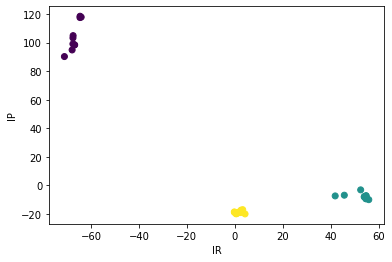

In [ ]:
plt.scatter(features['IR'],
            features['IP'],
            c=labels,
            cmap='viridis')

plt.xlabel("IR")
plt.ylabel("IP")
plt.show()

In [ ]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [ ]:
train_dataset = train_dataset.map(pack_features_vector)

In [ ]:
features, labels = next(iter(train_dataset))
print(labels[:5])


tf.Tensor([0 1 1 2 1], shape=(5,), dtype=int32)


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(10,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
94/94 [==============================] - 1s 1ms/step - loss: 10.0138 - accuracy: 0.7468
Epoch 2/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9924
Epoch 3/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9972
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9985
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 7/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9988
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.9989
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 10/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.9989


In [ ]:
model.fit(train_dataset, epochs=1, validation_data=test_dataset)

94/94 [==============================] - 1s 5ms/step - loss: 0.0026 - accuracy: 0.9987 - val_loss: 2.8996 - val_accuracy: 0.9220


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)

print('\nTest accuracy:', test_acc)

94/94 - 0s - loss: 2.8996 - accuracy: 0.9220

Test accuracy: 0.9219740033149719


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predict_dataset = tf.convert_to_tensor([
  [30.46,-158.61,-68.39,-33.79,-86.46,-41.94,-80.56,-31.86,-74.01, 69.72],
  [27.03,-31.21, 69.82,-24.28, 58.29, 31.93, 57.70,-18.33, 65.48, 25.95],
  [27.12,-30.96, 70.10,-24.35, 58.56, 31.84, 57.90,-18.49, 65.69, 25.66],
  [30.46,-158.55,-68.27,-33.75,-86.44,-41.58,-80.51,-31.96,-74.04, 69.61],
  [34.34,-152.21,-47.92,-22.47,-58.25,-84.96,-56.01,-14.01,-48.99, 55.52],
  [21.08,-110.66, -1.56,-26.44,-12.40, 21.09, -8.19, -9.77,  4.19, 32.25],
  [21.10,-110.86, -1.51,-26.74,-12.29, 20.74, -8.12,-10.12,  4.24, 31.96],
  [21.12,-110.97, -1.46,-26.95,-12.19, 20.50, -8.02,-10.38,  4.36, 31.72]
])
 
predict_labels = [0,1,1,0,0,2,2,2]

predictions = probability_model.predict(predict_dataset)

# print(predictions)

for i, logits in enumerate(predictions):
  correct_answer = class_names[predict_labels[i]]
  p = max(logits)
  class_idx = tf.argmax(logits).numpy()
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%), correct_answer is {}".format(i, name, 100*p, correct_answer))

Example 0 prediction: C (100.0%), correct_answer is A
Example 1 prediction: B (100.0%), correct_answer is B
Example 2 prediction: B (100.0%), correct_answer is B
Example 3 prediction: C (100.0%), correct_answer is A
Example 4 prediction: A (70.2%), correct_answer is A
Example 5 prediction: C (100.0%), correct_answer is C
Example 6 prediction: C (100.0%), correct_answer is C
Example 7 prediction: C (100.0%), correct_answer is C
